# **Analyzing Motor Vehicle Accidents in New York City in 2021**

Akriti Tripathi,
Mehak Hans,
Radhika Bapat

# Outline



*   Introduction 
*   Libaries Used 
*   About the data 
> - Data Source 
> - Data Load and View 

*   Analysis & Data Visualization 
*   Hypothesis Testing & Machine Learning Algorithm 
*   Conclusion 



















##**Introduction:**
New York City is one of the largest cities in the US with a population of 8.8 million. Due to this, there is constant traffic on the road and also a lot of pedestrians. Thus, car accidents are more likely to happen in a place very crowded. There are also a lot of ubers and taxis in NYC that add to the traffic and vehicles. In this project, we wanted to analyze the motor vehicle accidents that happen in NYC. Specifically we wanted to analyze the relationship between gender, age, time, and month of the crash as well as safety equipment and types of injuries to see which result in death or just injuries to find trends in the dataset. 

First, we imported the libarires that we would be using in our code. We also went ahead and read the csv file with the dataset and stored it as a dataframe.

## Libraries Used


*   Pandas: Used to display and organize in dataframes
*   Numpy: Used to support our data
*   Seaborn: Used to create plot
*   Matplotlib: Used to format plots
*   Scikit-learn: Used for predictive analysis tools




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot
import matplotlib.dates
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

## **About the Data**

The dataset we are using is data of a collision accident between a person and a motor vehicle that occurred in New York in 2021. 

**Data Source **

The datasource we got this from is Kaggle, here is the link to the kaggle page https://www.kaggle.com/kukuroo3/nyc-motor-vehicle-collisions-to-person

City of New York https://data.cityofnewyork.us/

Here we are going to load the data from the website and print out the first 5 columns of the dataset 

In [ ]:
df = pd.read_csv("NYC_Motor_Vehicle_Collisions_to_Person.csv")
df.head()

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,EJECTION,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Severe Bleeding,Apparent Death,NaN,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,NaN,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,NaN,NaN,Trapped,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,NaN,Driver,Driver,11819198,NaN,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,NaN,NaN,Not Ejected,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,NaN,Driver,Driver,11998317,NaN,4467504
3,2021-04-17,13:00,Killed,71.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,NaN,Internal,Unconscious,NaN,b950706b-00a4-485c-84c5-777208cc3cc9,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11745791,"Crossing, No Signal, or Crosswalk",4408062
4,2021-05-25,22:00,Killed,69.0,Entire Body,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,NaN,None Visible,Conscious,NaN,6504ea0a-c92d-444c-8127-284943be9aac,Unspecified,NaN,Pedestrian,11991283,"Crossing, No Signal, Marked Crosswalk",4420918


## **Analysis and Data Visualization**

Now we are going to process the data by some of the columns of the dataset to analyze the relationship between car crashes and gender, time and month of year. We are also going to look and analyze which injuries most often result in death and how safety equipment plays a role in decreasing injuries for occupants 

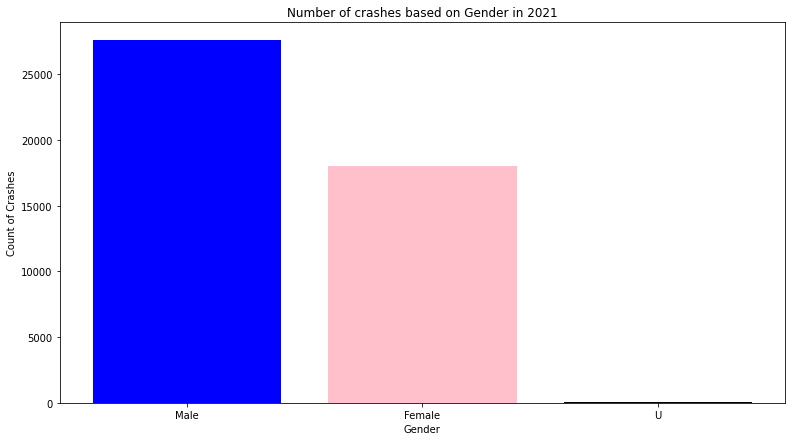

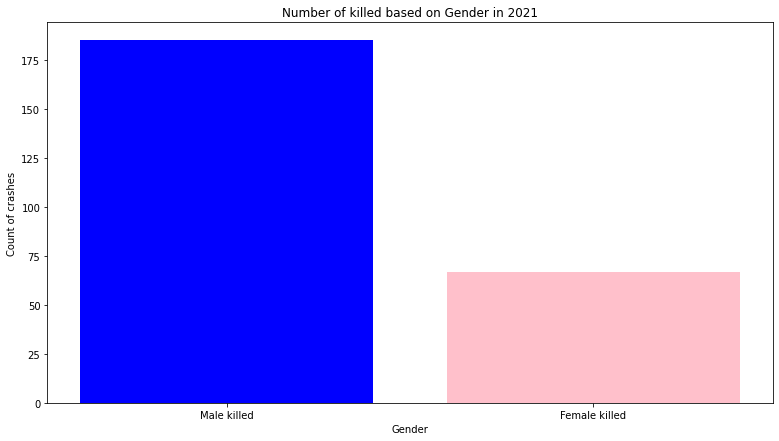

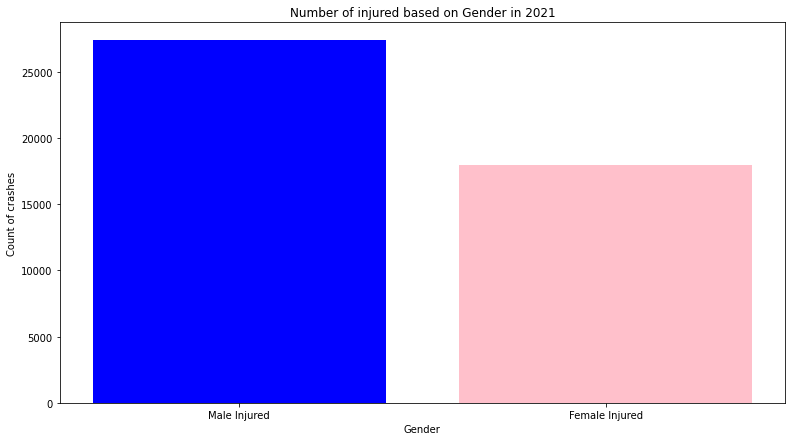

In [ ]:
#Analysis between number of crashes between male vs female
#Plots the total crashes between men and female
male_count = 0
female_count = 0
U_count = 0
for data in df['PERSON_SEX']:
    if data == 'M':
      male_count += 1
    elif data == 'F':
      female_count += 1
    elif data == "U":
      U_count +=1
index = ["Male", "Female", "U"]
gender = [male_count, female_count, U_count]
plt.figure(figsize=(13,7))
plt.bar(index, gender, align='center',color=['blue', 'pink', 'black'])
plt.title('Number of crashes based on Gender in 2021')
plt.xlabel('Gender')
plt.ylabel('Count of Crashes')
plt.show()


male_count_kills = 0
female_count_kills = 0
male_count_injured = 0
female_count_injured = 0
for index, rows in df.iterrows():
    if rows['PERSON_SEX']=='M' and rows['PERSON_INJURY']=='Killed':
      male_count_kills += 1
    elif rows['PERSON_SEX'] == 'F' and rows['PERSON_INJURY']=='Killed':
      female_count_kills += 1
    elif rows['PERSON_SEX']=='M' and rows['PERSON_INJURY']=='Injured':
      male_count_injured += 1
    elif rows['PERSON_SEX'] == 'F' and rows['PERSON_INJURY']=='Injured':
      female_count_injured += 1

#Plots the total crashes between men and female that are killed
index = ["Male killed", "Female killed"]
gender = [male_count_kills, female_count_kills]
plt.figure(figsize=(13,7))
plt.bar(index, gender, align='center', color=['blue', 'pink'])
plt.title('Number of killed based on Gender in 2021')
plt.xlabel('Gender')
plt.ylabel('Count of crashes')
plt.show()

#Plots the total crashes between men and female that are injured
index = ["Male Injured", "Female Injured"]
gender = [male_count_injured, female_count_injured]
plt.figure(figsize=(13,7))
plt.bar(index, gender, align='center', color=['blue', 'pink'])
plt.title('Number of injured based on Gender in 2021')
plt.xlabel('Gender')
plt.ylabel('Count of crashes')
plt.show()

From these graphs we can see that male drivers were more likely to get into crashes. In the first graph we first looked at the total amount of crashes and see who was most likely to get into a crash. Based on this graph we can conclude that Males were more likely to get into a crash by almost double. Next, we decided to look at the specific crashes to see the difference between killed and injured. We found that the injured ratio was similar to the ratio for the total crashes. However, for the numbers killed in the crash it can be seen that males in a crash had a signficiatnly high percentage of getting killed than females.

Now we are going to analyze at which time there were the most crashes and when there were the lowest number of crashes. 

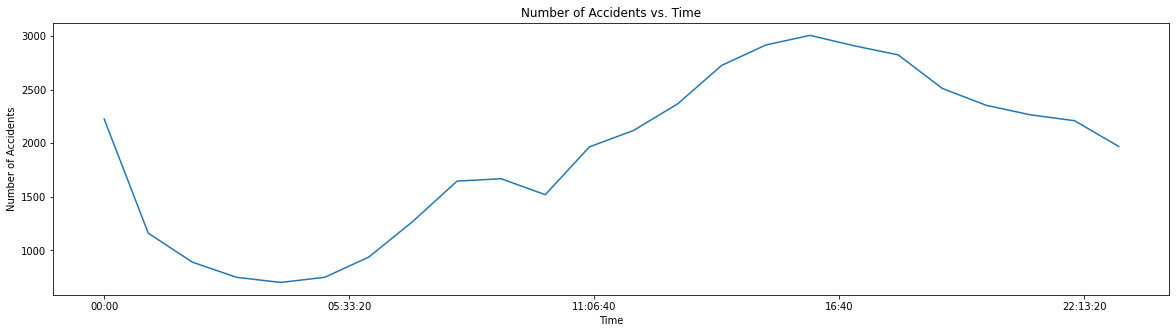

In [ ]:
df['CRASH_TIME'] = df['CRASH_TIME'].replace(' :00', np.nan)
df.dropna()
df['CRASH_TIME'] = pd.to_datetime(df['CRASH_TIME'],format= '%H:%M').dt.time

#prints a line plot of the time and number of crashes
df['CRASH_TIME'].value_counts().plot.line(figsize=(20,5))
plt.title('Number of Accidents vs. Time')
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.show()

This plot shows that the most number of accident happen at 16:00. Based off of this data, the most about of accidents happen during the day specifically from evening to night. The least amount of accidents happen from 1:00 - 6:00 am. This shows that the least accidents happen early morning because there are the least number of people on the road at this time. Based off of the graph it shows that the most crahes happen during rush hour when people finish work. 

Now we are going to specifically analyze in which month crashes happened the most and if there was a correlation between months and crashes. We used value_counts which is a pandas method to count the number of crashes in a certain month. We then printed out this bar graph based off of the counts.

6     5111
5     5066
10    5026
9     4986
8     4932
7     4855
4     4121
3     3545
1     3116
2     2561
11    2350
Name: month, dtype: int64


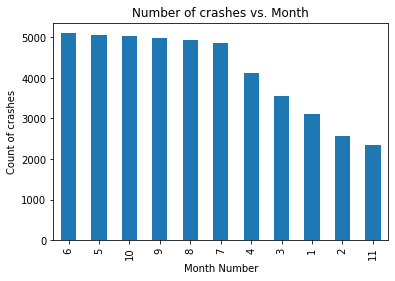

In [ ]:
#converts the crash date column into date time format
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
#creates a new column in the data frame with just the month number
df['month'] = df['CRASH_DATE'].dt.month
#counts how many crashes happened in a particular month
month_counts = df['month'].value_counts().astype(int)
print(month_counts)
#plots a bar graph showing the number of accidents vs. month
plt.title('Number of crashes vs. Month')
plt.xlabel('Month Number')
plt.ylabel('Count of crashes')
month_counts.plot(kind = 'bar')

As seen from this graph, it can be seen that the most amount of crashes happened in June. This is when summer starts so this is the time when NYC has the biggest number of tourists because people have breaks. Additionally, it can be seen that for months 1-4 there progressively started becoming more crashes. This can be a result of COVID-19. With strict restirctions and rising cases nobody was going to NYC in the beginning of 2021. However, as the mask mandate was lifted it can be seen that there were more crashes due to a higher population and more tourism. Novemeber is an outlier because it is low. This can be caused because this dataset is in 2021, so not all of November was recorded. 

We want to go ahead and see which injuries from car crashes are the most common within NYC by using pandas value_counts() and plotting it as a pie chart

In [ ]:
#This counts the number og specific injury counts 
bodily_injury_count = df['BODILY_INJURY'].value_counts()
print(bodily_injury_count)

Back                    7505
Knee-Lower Leg Foot     7243
Neck                    6776
Head                    6607
Entire Body             3842
Elbow-Lower-Arm-Hand    3509
Shoulder - Upper Arm    3299
Chest                   1645
Hip-Upper Leg           1636
Unknown                 1542
Face                    1158
Abdomen - Pelvis         809
Eye                       92
Does Not Apply             6
Name: BODILY_INJURY, dtype: int64


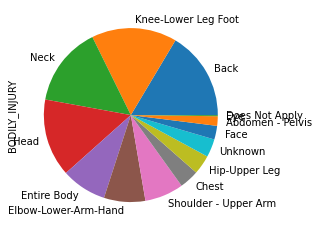

In [ ]:
#plots the injury counts in a pie chart to see the percentage of each injury
bodily_injury_count.plot(kind='pie')

From the pie chart above you can see that the most common injuries from car crashes in NYC are Neck, Head, Back and Knee-Lower Leg Foot injuries. From the dataset it seems like all of these injuries are similar in count. I expected entire body to be a common injury as well even though it is on the lower end of injuries. Now based on this information, we want to go and see which injuries most often result in death from the car crash.

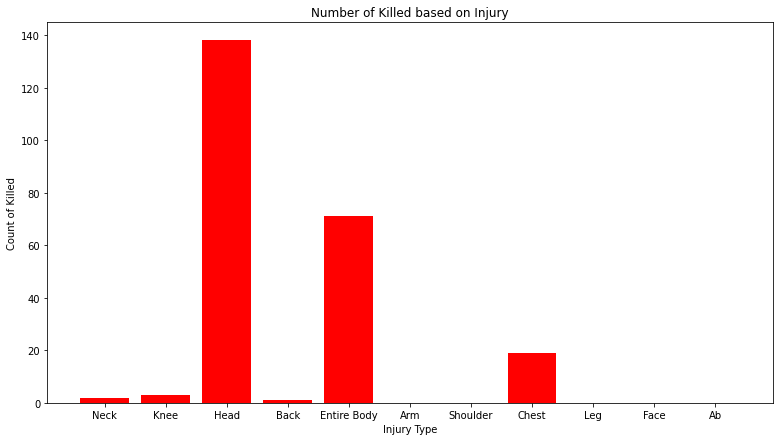

In [ ]:
neck_kills = 0
knee_kills = 0 
head_kills = 0
back_kills = 0
full_kills = 0 
arm_kills = 0 
shoulder_kills = 0
chest_kills = 0 
leg_kills = 0 
face_kills = 0 
ab_kills = 0 
#iterates through the dataset to find the number of individuals killed based on their type of injury 
for index, rows in df.iterrows():
    if rows['BODILY_INJURY']=='Neck' and rows['PERSON_INJURY']=='Killed':
      neck_kills += 1
    elif rows['BODILY_INJURY'] == 'Knee-Lower Leg Foot' and rows['PERSON_INJURY']=='Killed':
      knee_kills += 1
    elif rows['BODILY_INJURY']=='Back' and rows['PERSON_INJURY']=='Killed':
      back_kills += 1
    elif rows['BODILY_INJURY'] == 'Head' and rows['PERSON_INJURY']=='Killed':
      head_kills += 1
    elif rows['BODILY_INJURY'] == 'Entire Body' and rows['PERSON_INJURY'] == 'Killed':
      full_kills += 1
    elif rows['BODILY_INJURY'] == 'Elbow_Lower-Arm-Hand' and rows['PERSON_INJURY'] == 'Killed':
      arm_kills += 1
    elif rows['BODILY_INJURY'] == 'Shoulder - Upper Arm' and rows['PERSON_INJURY'] == 'Killed':
      shoulder_kills += 1
    elif rows['BODILY_INJURY'] == 'Chest' and rows['PERSON_INJURY'] == 'Killed':
      chest_kills += 1 
    elif rows['BODILY_INJURY'] == 'Hit-Upper Leg' and rows['PERSON_INJURY'] == 'Killed':
      leg_kills += 1 
    elif rows['BODILY_INJURY'] == 'Abdomen-Pelvis' and rows['PERSON_INJURY'] == 'Killed':
      ab_kills += 1
    elif rows['BODILY_INJURY'] == 'Face' and rows['PERSON_INJURY'] == 'Killed':
      face_kills += 1
    
#plots a bar graph to show how many were killed based on injuries   
index = ["Neck", "Knee", "Head", "Back", "Entire Body", "Arm", "Shoulder", "Chest", "Leg", "Face", "Ab"]
kills = [neck_kills, knee_kills, head_kills, back_kills, full_kills, arm_kills, shoulder_kills, chest_kills, 
        leg_kills, face_kills, ab_kills]
plt.figure(figsize=(13,7))
plt.bar(index, kills, align='center', color=['red'])
plt.title('Number of Killed based on Injury')
plt.xlabel('Injury Type')
plt.ylabel('Count of Killed')
plt.show()


Based on the above bar chart we can see that head and entire body injuries most often lead to death. Entire body injuries are not as common as head, back, knee and leg injuries however they are the second most likely after head to lead to death. Chest, neck and knee also result in death however a lot less are killed with those injuries. We also see that the other injuries did not result in any death.

We did not include the count for unknown bodily injuries/does not apply injuries since we would not be able to gain much information seeing if those variables led to death

Now we want to go in and see of the occupants who were in the car how many were injured or killed and how that relates to whether they had a seat belt on or if an air bag deployed using a bar chart.

In [ ]:
#This counts the number of safety equpiments that were used in each accident 
safety_equipment_count = df['SAFETY_EQUIPMENT'].value_counts()
print(safety_equipment_count)

Lap Belt & Harness                          18184
Unknown                                      6818
None                                         5942
Lap Belt                                     3711
Helmet (Motorcycle Only)                     1205
Helmet Only (In-Line Skater/Bicyclist)       1047
Air Bag Deployed/Lap Belt/Harness             926
Child Restraint Only                          490
Helmet/Other (In-Line Skater/Bicyclist)       326
Air Bag Deployed                              261
Other                                         233
Air Bag Deployed/Lap Belt                     145
Harness                                       104
Air Bag Deployed/Child Restraint               26
Pads Only (In-Line Skater/Bicyclist)           11
Stoppers Only (In-Line Skater/Bicyclist)        5
Name: SAFETY_EQUIPMENT, dtype: int64


From these variables I only want to look at whether occupants had seat belts on, a harness on, child restraints, or if the airbag was deployed to see how that relates to whether they were injured

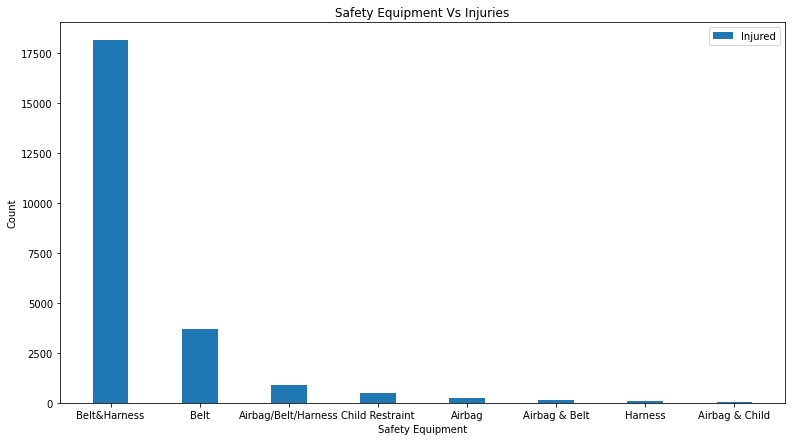

In [ ]:
belt_harness_injured = 0 
belt_injured = 0 
airbag_belt_harness_injured = 0 
child_restraint_injured = 0 
airbag_injured = 0 
airbag_belt_injured = 0 
harness_injured = 0
airbag_child_injured = 0 
 
#iterates through the dataset to find the number of injuries for the occupants based on what safety equipment was deployed 
for index, rows in df.iterrows():
  if rows['SAFETY_EQUIPMENT'] == 'Lap Belt & Harness' and rows['PERSON_INJURY']=='Injured' and rows['PERSON_TYPE'] == 'Occupant':
    belt_harness_injured += 1
  elif rows['SAFETY_EQUIPMENT'] == 'Lap Belt' and rows['PERSON_INJURY']=='Injured' and rows['PERSON_TYPE'] == 'Occupant':
    belt_injured += 1
  elif rows['SAFETY_EQUIPMENT'] == 'Air Bag Deployed/Lap Belt/Harness' and rows['PERSON_INJURY']=='Injured'and rows['PERSON_TYPE'] == 'Occupant':
    airbag_belt_harness_injured += 1 
  elif rows['SAFETY_EQUIPMENT'] == 'Child Restraint Only'and rows['PERSON_INJURY']=='Injured' and rows['PERSON_TYPE'] == 'Occupant':
    child_restraint_injured += 1 
  elif rows['SAFETY_EQUIPMENT'] == 'Air Bag Deployed' and rows['PERSON_INJURY']=='Injured' and rows['PERSON_TYPE'] == 'Occupant':
    airbag_injured += 1
  elif rows['SAFETY_EQUIPMENT'] == 'Air Bag Deployed/Lap Belt'and rows['PERSON_INJURY']=='Injured' and rows['PERSON_TYPE'] == 'Occupant':
    airbag_belt_injured += 1
  elif rows['SAFETY_EQUIPMENT'] == 'Harness' and rows['PERSON_INJURY']=='Injured' and rows['PERSON_TYPE'] == 'Occupant':
    harness_injured += 1
  elif rows['SAFETY_EQUIPMENT'] == 'Air Bag Deployed/Child Restraint' and rows['PERSON_INJURY']=='Injured'and rows['PERSON_TYPE'] == 'Occupant':
    airbag_child_injured += 1

#This creates a bar graph showing which safety equipment was used and the number of injuries
safety_equipment = ["Belt&Harness", "Belt", "Airbag/Belt/Harness", "Child Restraint", "Airbag", 
                    "Airbag & Belt", "Harness", "Airbag & Child"]
injured = [belt_harness_injured, belt_injured, airbag_belt_harness_injured, child_restraint_injured,
           airbag_injured, airbag_belt_injured, harness_injured, airbag_child_injured]
plt.figure(figsize=(13,7))
plt.bar(safety_equipment, injured, 0.4, label = 'Injured')
plt.xlabel("Safety Equipment")
plt.ylabel("Count")
plt.title("Safety Equipment Vs Injuries")
plt.legend()
plt.show()

Based on the graph above we can see that the injuries decrease a lot as soon as airbags are brought into the picture. So when an individual only has a belt or belt and harness on we see the number of injuries go up. The number of injuries for belt is lower than belt and harness and we think that is because most individuals wear both the belt and harness while driving so the number of people wearing a belt is very low, thus the injuries being lower. So the safety feature and number of injuries for the occupant is correlated based on this bar graph 

We will now compare the type of person that was involved in the accident and whether they were injured or killed. From the output below, we can see that the number of injuries was clearly a lot larger than the number of kills for each respective type of person. 

In [ ]:
df.groupby(["PERSON_TYPE", "PERSON_INJURY"]).size()

PERSON_TYPE      PERSON_INJURY
Bicyclist        Injured           4448
                 Killed              16
Occupant         Injured          32791
                 Killed             112
Other Motorized  Injured           1876
                 Killed              11
Pedestrian       Injured           6301
                 Killed             114
dtype: int64

The bar graph below shows how pedestrians and occupants of the car faced about the same number of injuries and kills, whereas bicyclists and other motorized individuals faced a lot fewer deaths. We think that this is because the number of accidents with bicyclists is a lot lower than with pedestrians and people riding bicyles have helmets and knee pads which protect them where as pedestrains do not have any sort of protection making their death rate higher. Also occupants number of deaths is lower than pedestrians but still very high since the number of accidents for the occupant is higher than all the other person types but their death rate is lower due to the safety features in a car. 

Text(0, 0.5, 'Number of Deaths')

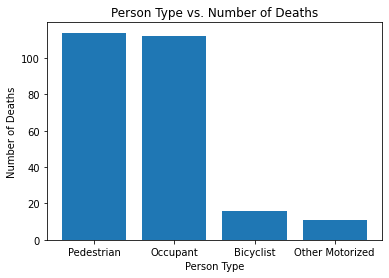

In [ ]:
kill_p = 0
kill_o = 0
kill_b = 0
kill_other = 0
injure_p = 0
injure_o = 0
injure_b = 0
injure_other = 0

# iterates through the columns and incremenets respective variables
for index, rows in df.iterrows():
  if rows["PERSON_TYPE"] == "Pedestrian" and rows["PERSON_INJURY"] == "Killed":
    kill_p += 1
  elif rows["PERSON_TYPE"] == "Pedestrian" and rows["PERSON_INJURY"] == "Injured":
    injure_p += 1
  elif rows["PERSON_TYPE"] == "Occupant" and rows["PERSON_INJURY"] == "Killed":
    kill_o += 1
  elif rows["PERSON_TYPE"] == "Occupant" and rows["PERSON_INJURY"] == "Injured":
    injure_o += 1
  elif rows["PERSON_TYPE"] == "Bicyclist" and rows["PERSON_INJURY"] == "Killed": 
    kill_b += 1
  elif rows["PERSON_TYPE"] == "Bicyclist" and rows["PERSON_INJURY"] == "Injured": 
    injure_b += 1
  elif rows["PERSON_TYPE"] == "Other Motorized" and rows["PERSON_INJURY"] == "Killed":
    kill_other += 1
  elif rows["PERSON_TYPE"] == "Other Motorized" and rows["PERSON_INJURY"] == "Injured":
    injure_other += 1

# creates lists for plotting purposes
person_type = ["Pedestrian", "Occupant", "Bicyclist", "Other Motorized"]
number_kills = [kill_p, kill_o, kill_b, kill_other]
number_injured = [injure_p, injure_o, injure_b, injure_other]

# plots person type vs number of deaths 
plt.bar(person_type, number_kills)
plt.title('Person Type vs. Number of Deaths')
plt.xlabel('Person Type')
plt.ylabel('Number of Deaths')


The graph below shows that mainly occupants of the car are injured, as opposed to pedestrians, bicyclists, and other motorized individuals. We also think this is the case again because the number of accidents occupants get in is much higher than that of other person types so the number of injuries is much greater. Pedstrain is the next highest which makes sense again since they have no form of protection against them and then bicyclists who have helmets followed by other moterized individuals. 

Text(0, 0.5, 'Number of Injuries')

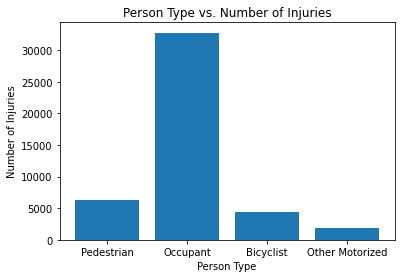

In [ ]:
# plots person type vs number of deaths 
plt.bar(person_type, number_injured)
plt.title('Person Type vs. Number of Injuries')
plt.xlabel('Person Type')
plt.ylabel('Number of Injuries')

Now that we have seen how crashes in NYC relate to gender, time and month as well as which injuries lead to death, how safety equipment plays a role in preventing injuries and which people are injured or killed the most in the accidents between vehicles and pedestrians, we will perform our machine learning model in the next step 

###**Analysis, Hypothesis Testing and Machine Learning:**

During this step, we will attempt to perform a modeling technique called linear regression to create a predictive model of our data, which will allow us to predict future values that are not present in our data. Our data only gives data for accidents that occur from January 1st to November 16th 2021, so we can predict the values of November and December using our model. 

In order to see whether the number of accidents were correlated to the month (ex: higher in winter months, etc.), we decided to create a linear regression model in order to delve deeper into the model. Specifically, we will be modeling the frequency of accidents per month in 2021 in order to predict the number of accidents for November and December. The reason for predicting November as well is because the dataset stopped updating the data after November 16, so the frequency provided was not sufficient. 

To start off, we first calculate the frequency of accidents for each month and store them into their respective lists. We remove data from the month of November due to the reason previously mentioned. We then created a scatter plot of the month vs frequency of accidents per month.

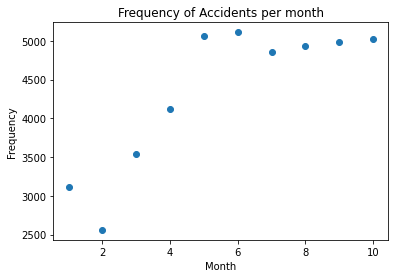

In [ ]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

# puts the unique elements of the months (1-11) into list
month = df['CRASH_DATE'].dt.month.astype(int).unique()
# sorts the list in increasing order (Jan - November)
month = sorted(month)
# puts the frequenecy of each month into list
counts = df['CRASH_DATE'].dt.month.value_counts().sort_index().tolist()
# deletes data from November
month.pop()
counts.pop()

counts = np.array(counts)
month = np.array(month)

y_axis = counts
x_axis = month.reshape(-1, 1)

# creates scatter plot of month vs frequency of accidents
plt.scatter(month, counts)
plt.title("Frequency of Accidents per month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

It is clear that the trend above is positive, showing that the frequency of accidents increase throughout the year. To obtain a linear model that displays a line through the data, we will use the linear_model module from sklearn. This will create a line that will fit the data, when given X and Y values. 

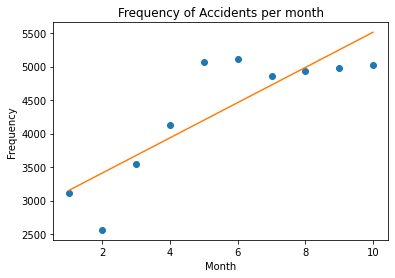

In [ ]:
# creates a 2D array
month_ = []
for m in month:
    month_.append([m])
# plots data points
plt.plot(month,counts,'o')

# creates linear model for data, using data from month and counts arrays
mod = linear_model.LinearRegression()
mod.fit(month_, counts)
predicted = mod.predict(month_)

# plots the model
plt.plot(month, predicted)
plt.title("Frequency of Accidents per month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

The call mod.fit(X,Y) allows for the data to be read and for a model to be created based on the data. Our model clearly produces a line that attemps to fit our data points. In order to see how well the line fits our data, we will look at the R^2 value. The closer this value is to 1, the better our model fits the data, and the closer it is to 0, the worse it fits the data. We will now print the R^2 value of the model:

In [ ]:
# prints R^2 value
print(mod.score(month_,counts))

0.7146345234377098


The R^2 value is about 0.71, which is a relatively okay score. Thus, we can use the model above to predict the frequency of crashes for November and December.

In [ ]:
# predicts value for November
mod.predict([[11]])

array([5776.8])

In [ ]:
# predicts value for December
mod.predict([[12]])

array([6039.50909091])

Based on the output above, our model predicts that there will be about 5776 in November and 6039 in December. However, it is important to take into consideration that this data is only for 1 year. The dataset is extremely specific, and our predictions may not be accurate and reliable until we have access to previous years. 

Besides a linear model, we can also fit our data using a polynomial function using the PolynomialFeatures module from sklearn. Below we will model our data using a polynomial function with degree = 2.


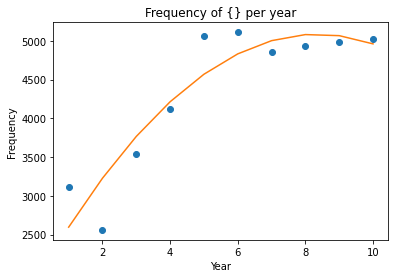

0.8553924711226452


In [ ]:
# Polynomial Regression

plt.plot(month,counts,'o')

# creates polynomial model for data, using data from month and counts arrays (degree 2)
poly = PolynomialFeatures(degree=2)
poly_months = poly.fit_transform(month_)
mod.fit(poly_months,counts)

poly_pred = mod.predict(poly_months)
plt.title("Frequency of accidents per month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.plot(month,poly_pred)

plt.show()
print(mod.score(poly_months,counts))

Our R^2 value has clearly increased to 0.855, showing that this model fits our data better than the linear model. 

We will now try a polynomial model with degree = 3. 

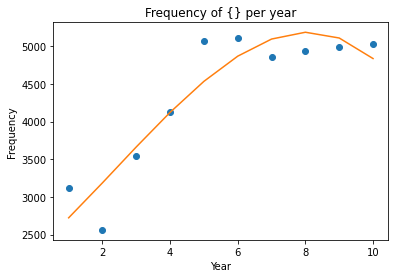

0.8649560410910498


In [ ]:
plt.plot(month,counts,'o')

# creates polynomial model for data, using data from month and counts arrays (degree 3)
poly = PolynomialFeatures(degree=3)
poly_months = poly.fit_transform(month_)
mod.fit(poly_months,counts)

# plots the model
poly_pred = mod.predict(poly_months)
plt.title("Frequency of accidents per month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.plot(month,poly_pred)

plt.show()
# prints R^2 value
print(mod.score(poly_months,counts))

Our R^2 has increased again to 0.865. However, it is usually not advised to increase the degree as it tends to fit the data unnaturally, seen above. Therefore, we will stick with our linear model. 

## **Conclusion** 

We will now attempt to analyze our data in order to draw conclusions and predictions. 

Based on our observations through various graphs and modeling techniques that we used, we can conclude that within NYC:
1. accidents tend to increase throughout the year, so it is important to remain cautious, alert, and vigilant while driving or simply walking on the streets. 
2. accidents typically occur at the highest rate around the afternoon time. This past year, 4-6pm was the most frequent time of accidents. This could very easily be related to rush hour, where many are leaving their work offices to go back home. Of course, in NYC however, every hour is rush hour due to the amount of traffic prevalent within the city.  
3. injuries are less frequent due to motor vehicle accidents when airbags are involved. This is a good indication that vehicles should always be checked to ensure that all safety equipment, especially airbags, are fully functional. 

Overall, the above conclusions were made based on data from 2021 in NYC. It is important to note, however, that the analysis we conducted could be unreliable. Because our dataset was so specific, focused only on one year within one city, we cannot jump to conclusions safely. In addition, due to the pandemic in 2021 some of this data can be unreliable because the city would not have had as many people as it usually does. In order to accurately make predictions and conclusions, we would expand the areas we were observing and potentially acquire data from previous years. This would give us a holistic picture based on reliable data from a vast time period and area coverage. 

